In [1]:
import torch
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
from abc import abstractmethod
import numpy as np
from glob import glob
import os
import soundfile
from onsets_and_frames.dataset import MAPS

batch_size = 8
sequence_length = 327680
model_complexity = 48
resume_iteration = 0
iterations = 500000
DEFAULT_DEVICE = 'cuda:0'


validation_length = sequence_length
validation_interval = 500

STFT filter created, time used = 0.2122 seconds
Mel filter created, time used = 0.0051 seconds


In [2]:
dataset = MAPS(groups=['AkPnBcht', 'AkPnBsdf', 'AkPnCGdD', 'AkPnStgb', 'SptkBGAm', 'SptkBGCl', 'StbgTGd2'], sequence_length=sequence_length, device=DEFAULT_DEVICE)
validation_dataset = MAPS(groups=['ENSTDkAm', 'ENSTDkCl'], sequence_length=validation_length, device=DEFAULT_DEVICE)

loader = DataLoader(dataset, batch_size, shuffle=True, drop_last=True)

Loading group AkPnBsdf:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 7 groups of MAPS at data/MAPS


Loading group ENSTDkCl:   0%|          | 0/30 [00:00<?, ?it/s]

Loading 2 groups of MAPS at data/MAPS


Loading group ENSTDkCl: 100%|██████████| 30/30 [00:00<00:00, 177.84it/s]


In [3]:
for batch in loader:
    break

In [7]:
audio_label = batch['audio']

In [11]:
audio_label.shape

torch.Size([8, 327680])

In [16]:
from onsets_and_frames import constants
from nnAudio import Spectrogram

In [10]:
audio_label.reshape(-1, audio_label.shape[-1])[:, :-1].shape

torch.Size([8, 327679])

In [20]:
melspectrogram = Spectrogram.MelSpectrogram(SAMPLE_RATE, WINDOW_LENGTH, N_MELS, HOP_LENGTH,
                                            fmin=MEL_FMIN, fmax=MEL_FMAX, trainable_mel=True, device=DEFAULT_DEVICE)

STFT filter created, time used = 0.2636 seconds
Mel filter created, time used = 0.0059 seconds


In [23]:
mel = melspectrogram(audio_label)

In [22]:
import matplotlib.pyplot as plt

In [29]:
mel.shape

torch.Size([8, 229, 641])

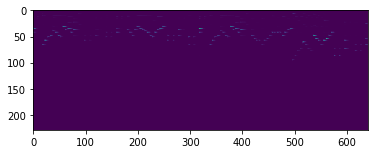

In [28]:
plt.imshow(mel[0].detach().cpu().numpy())